In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
a = 0.1 
b = 0.95 #Sensitivity
c = 0.85 #Specificity

def get_probabilities(a,b,c):
    p1 = (a-a*b)/(a+c-a*b-a*c) #Part I = P(H/E̅)
    p2 = a*b/(a*b+a*c-a-c+1) #PPV = P(H/E)
    p3 = 1-p2 #Part II = P(H̅/E)
    return p1,p2,p3

print(get_probabilities(a,b,c))
print(get_probabilities(a,b,c=b))

(0.006493506493506499, 0.4130434782608696, 0.5869565217391304)
(0.005813953488372097, 0.6785714285714285, 0.3214285714285715)


In [7]:
PER_ = 100000
num_corona_carriers = get_probabilities(a=0.1,b=0.95,c=0.95)[0]*PER_ #_per_lakh negative test results
print("Out of ",PER_," negative test results, possible number of corona carriers set free = ",num_corona_carriers)

Out of  100000  negative test results, possible number of corona carriers set free =  581.3953488372098


In [8]:

print("Even if Alice's test results are positive, there are ",str(100*get_probabilities(a=0.1,b=0.95,c=0.95)[2])+"% chances that he doesn't have COVID-19 infection.")

Even if Alice's test results are positive, there are  32.14285714285715% chances that he doesn't have COVID-19 infection.


'''
**Assessing impacts of improving Sensitivity & Specificity**
'''

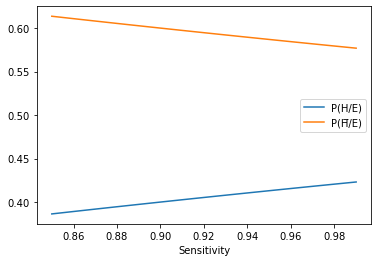

In [5]:
#Effect of Sensitivity on chances of not having corona even if test results are positive
a = 0.1 
b = 0.95 #Sensitivity
c = 0.85 #Specificity

X = []
Y1 = []
Y2 = []
for bi in np.arange(0.85,0.99,0.01):
    b = bi
    p1 = (a-a*b)/(a+c-a*b-a*c)
    p2 = a*b/(a*b+a*c-a-c+1) 
    p3 = 1-p2

    X.append(bi)
    Y1.append(p2)
    Y2.append(p3)

plt.figure()
plt.xlabel("Sensitivity")
plt.plot(X,Y1,label="P(H/E)")
plt.plot(X,Y2,label="P(H̅/E)")
plt.legend()

'''
**Observations from above Plot:**

As sensitvity increases, chances for test results being correct increases.That is, it becomes more accurate with increasing Specificity.
'''

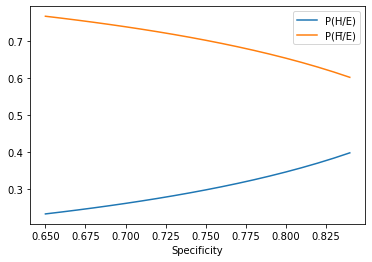

In [6]:
#Effect of Specificity on chances of not having corona even if test results are positive
a = 0.1 
b = 0.95
c = 0.95

X = []
Y1 = []
Y2 = []
for ci in np.arange(0.65,0.85,0.01):
    c = ci
    p1 = (a-a*b)/(a+c-a*b-a*c)
    p2 = a*b/(a*b+a*c-a-c+1) 
    p3 = 1-p2

    X.append(ci)
    Y1.append(p2)
    Y2.append(p3)

plt.figure()
plt.xlabel("Specificity")
plt.plot(X,Y1,label="P(H/E)")
plt.plot(X,Y2,label="P(H̅/E)")
plt.legend()

'''
**Observations from above Plot:**

As specificity increases, chances for test results being correct increases.That is, it becomes more accurate with increasing Specificity.
'''